In [1]:
import sys
sys.path.append("../")
from request.dao import Dao
from PyQt5.QtWidgets import QApplication
from pandas import DataFrame
from entity.stock import Stock
from request.enum.stockEnum import CandleUnit
import matplotlib.pyplot as plt

In [2]:
app = QApplication([])

In [3]:
Dao().login()

In [4]:
e_mart = Dao().request_stock_instance("139480")
print(e_mart.get_code_name())


139480


In [5]:
a= Dao().get_today_date()
a


'20210115'

In [6]:
data = Dao().request_candle_data(e_mart,CandleUnit.MINUTE,15)
data

      20210115144000
      20210115143930
      20210115143900
      20210115143830
      20210115143800
      20210115143730
      20210115143700
      20210115143630
      20210115143600
      20210115143530
      20210115143500
      20210115143430
      20210115143400
      20210115143330
      20210115143300
      20210115143230
      20210115143200
      20210115143130
      20210115143100
      20210115143030
      20210115143000
      20210115142930
      20210115142900
      20210115142830
      20210115142800
      20210115142730
      20210115142700
      20210115142630
      20210115142600
      20210115142530
      20210115142500
      20210115142430
      20210115142400
      20210115142330
      20210115142300
      20210115142230
      20210115142200
      20210115142130
      20210115142100
      20210115142030
      20210115142000
      20210115141930
      20210115141900
      20210115141830
      20210115141800
      20210115141730
      20210115141700
      2021011

,time,open,close,low,high,volume,ma5,ma10,ma20,ma60
0,2021-01-15 14:40:00,175000,175500,175000,175500,398,NaN,NaN,NaN,NaN
1,2021-01-15 14:39:30,175000,175000,175000,175500,177,NaN,NaN,NaN,NaN
2,2021-01-15 14:39:00,175000,175500,175000,176000,183,NaN,NaN,NaN,NaN
3,2021-01-15 14:38:30,175000,175500,175000,176000,390,NaN,NaN,NaN,NaN
4,2021-01-15 14:38:00,175000,175500,175000,175500,113,175400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
495,2021-01-15 10:32:30,174000,174500,174000,174500,353,174400.0,174300.0,174175.0,173741.666667
496,2021-01-15 10:32:00,174000,174000,174000,174500,412,174400.0,174250.0,174175.0,173750.000000
497,2021-01-15 10:31:30,174000,174000,174000,174500,180,174300.0,174250.0,174175.0,173750.000000
498,2021-01-15 10:31:00,174000,174500,174000,174500,54,174300.0,174300.0,174200.0,173766.666667


In [7]:

# plt.plot(data.time, data.ma5, label='ma5')
# plt.xlabel('time')
# plt.ylabel('close')
# plt.legend(loc="best")
# plt.grid()
# plt.show()

In [8]:
import mpl_finance 
import matplotlib.ticker as ticker
%matplotlib inline

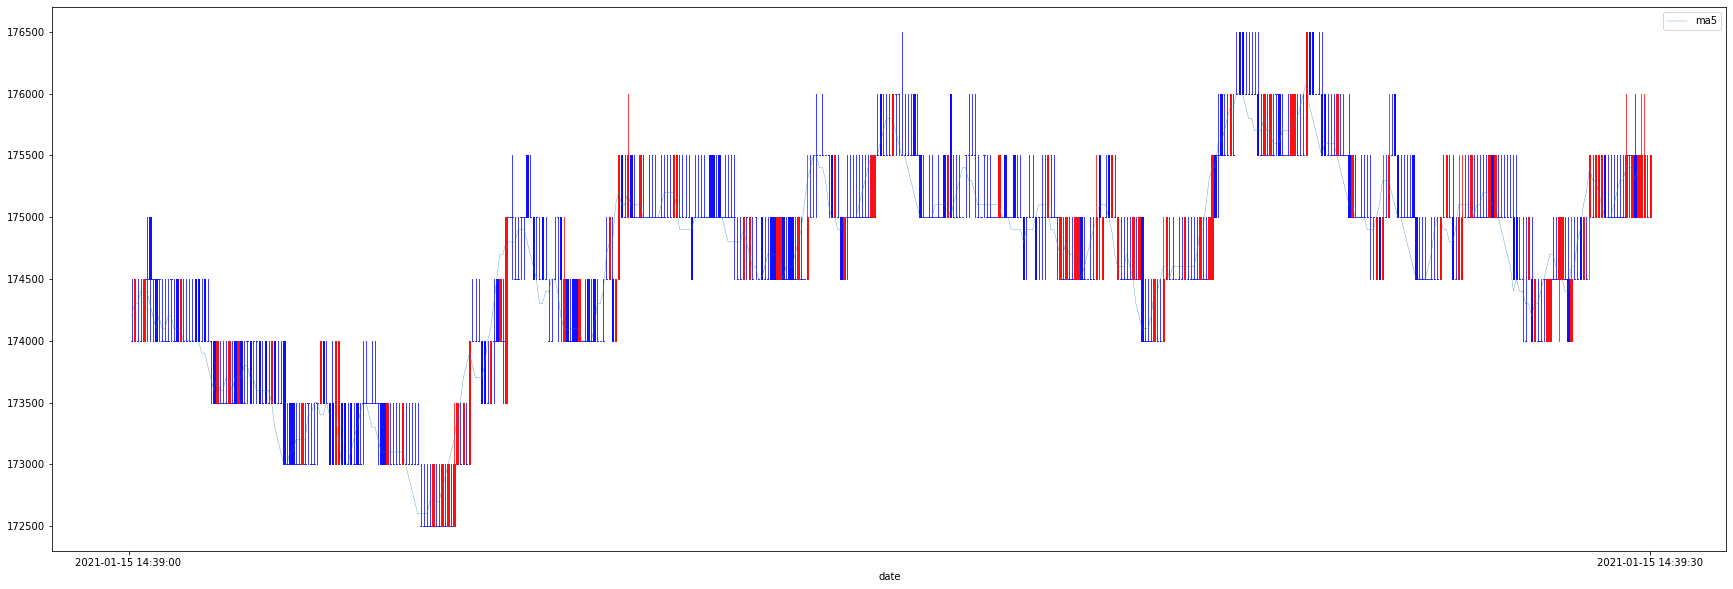

In [9]:
fig = plt.figure(figsize=(30,10))
ax=fig.add_subplot(111)

ax.plot(data.index, data.ma5, label="ma5", linewidth='0.3')
ax.xaxis.set_major_locator(ticker.MaxNLocator(1))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(data.time))
ax.invert_xaxis()
ax.set_xlabel("date")

mpl_finance.candlestick2_ohlc(ax, data.open, data.high, data.low, data.close, width=0.5, colorup='r', colordown='b')
plt.legend(loc="best")
plt.show()